<a href="https://colab.research.google.com/github/yasirabd/research-diagnostic-turbine/blob/main/Bearing_Turbine_Regression_Multiple_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author: Yasir Abdur Rohman*<br>
**Property of PT Indonesia Power & Lab Getaran & Diagnosis Mesin Undip**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score

import plotly.express as px
import plotly.graph_objs as go

# Prepare dataset

In [ ]:
# load dataset

# sla 18
df = pd.read_excel("/content/drive/MyDrive/Turbine Bearing/Data/Data_SLA_Unit_1_2018.xlsx")
df.head()

Tanggal  ...     Rotation
0 2018-01-01 00:00:00  ...  3006.838867
1 2018-01-01 00:10:00  ...  3004.786621
2 2018-01-01 00:20:00  ...  3000.594727
3 2018-01-01 00:30:00  ...  3004.507812
4 2018-01-01 00:40:00  ...  3004.192871

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Tanggal                                     52560 non-null  datetime64[ns]
 1   Generator Output (MW)                       52560 non-null  float64       
 2   Generator VAR (MVAR)                        52560 non-null  float64       
 3   Turb Bearing Vib 1 (uM)                     52560 non-null  float64       
 4   Turb Bearing Vib 2 (uM)                     52560 non-null  float64       
 5   Turb Bearing Vib 3 (uM)                     52560 non-null  float64       
 6   Turb Bearing Vib 4 (uM)                     52560 non-null  float64       
 7   Turb Bearing Vib 5 (uM)                     52560 non-null  float64       
 8   Turb Bearing Vib 6 (uM)                     52560 non-null  float64       
 9   Gen Be

We will implement this mechanical model or likely similar to that.

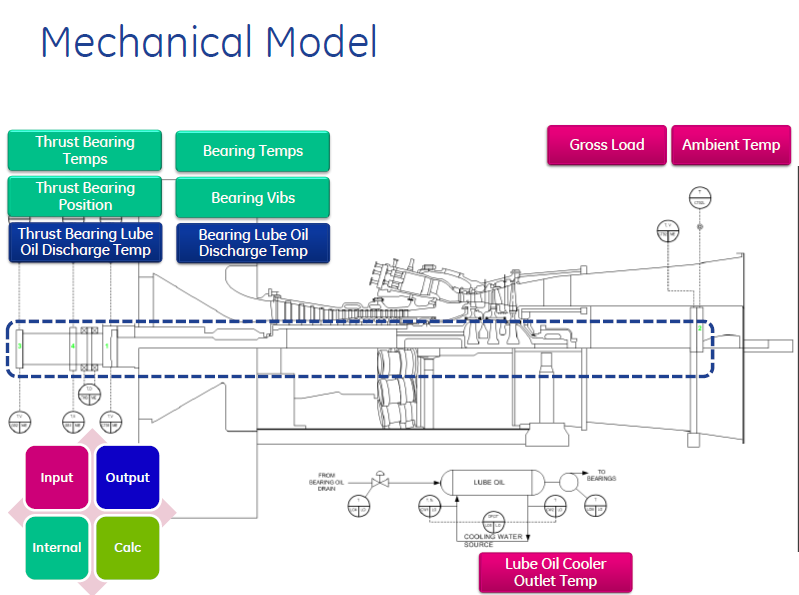

In [ ]:
# select choosen sensor
col_features = ['Generator Output (MW)',  ##
                'Turb Bearing Vib 1 (uM)',
                'Lube Oil Outlet Cooler Temp Ct (Deg)',  ##
                'Thrust Bearing Metal Temp  Front( Deg )',
                'Thrust Bearing Metal Temp  Rear( Deg )',
                'No 1 Turb Bearing Metal Temp A ( Deg )',  ##
                'No 1 Turb Bearing Metal Temp B ( Deg )']  ## 
                
col_target = ['No 1 Bearing Oil Drain Temp (Deg)',  ##
              'Thrust Bearing Oil Drain Temp FR (Deg)',
              'Thrust Bearing Oil Drain Temp RR (Deg)']

data = df[col_features + col_target]
data.head()

Generator Output (MW)  ...  Thrust Bearing Oil Drain Temp RR (Deg)
0             250.161911  ...                               44.673103
1             256.526062  ...                               44.649612
2             252.822952  ...                               44.703526
3             255.816757  ...                               44.692429
4             246.595398  ...                               44.736980

[5 rows x 10 columns]

In [ ]:
data.describe()

Generator Output (MW)  ...  Thrust Bearing Oil Drain Temp RR (Deg)
count           52560.000000  ...                            52560.000000
mean              292.264828  ...                               43.402906
std               156.958298  ...                                5.485456
min                -1.443331  ...                                0.000000
25%               258.624840  ...                               44.805270
50%               385.170364  ...                               45.826992
75%               395.356354  ...                               45.926758
max               487.093170  ...                               56.243649

[8 rows x 10 columns]

# Split dataset

In [ ]:
# check null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Generator Output (MW)                    52560 non-null  float64
 1   Turb Bearing Vib 1 (uM)                  52560 non-null  float64
 2   Lube Oil Outlet Cooler Temp Ct (Deg)     52560 non-null  float64
 3   Thrust Bearing Metal Temp  Front( Deg )  52560 non-null  float64
 4   Thrust Bearing Metal Temp  Rear( Deg )   52560 non-null  float64
 5   No 1 Turb Bearing Metal Temp A ( Deg )   52560 non-null  float64
 6   No 1 Turb Bearing Metal Temp B ( Deg )   52560 non-null  float64
 7   No 1 Bearing Oil Drain Temp (Deg)        52560 non-null  float64
 8   Thrust Bearing Oil Drain Temp FR (Deg)   52560 non-null  float64
 9   Thrust Bearing Oil Drain Temp RR (Deg)   52560 non-null  float64
dtypes: float64(10)
memory usage: 4.0 MB


In [ ]:
# check data shape
data.shape

(52560, 10)

In [ ]:
# split data into data train and data test
train_size = .70
train_set, test_set = np.split(data, [int(train_size *len(data))])

train_set.shape, test_set.shape

((36792, 10), (15768, 10))

# Multi-output regressor with Xgboost

In [ ]:
X_train = train_set[col_features]
y_train = train_set[col_target]

In [ ]:
# initialize model
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', random_state=2021))

# training
multioutputregressor.fit(X_train, y_train)

# training score
score = multioutputregressor.score(X_train, y_train)
print(f'Training score (r2 score): {score}')

Training score (r2 score): 0.9997685606751148


In [ ]:
# predict and evaluate on test set
X_test = test_set[col_features]
y_test = test_set[col_target]

# predict
y_pred = multioutputregressor.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.4655222324886328
R2 score: 0.7661468562296813


In [ ]:
# plot y test and y pred
fig = go.Figure()

# true
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_test.iloc[:,0],
                         line=dict(color='royalblue'),
                         name=y_test.columns[0]))
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_test.iloc[:,1],
                         line=dict(color='royalblue'),
                         name=y_test.columns[1]))
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_test.iloc[:,2],
                         line=dict(color='royalblue'),
                         name=y_test.columns[2]))

# predict
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_pred[:,0],
                         line=dict(color='red'),
                         name='Pred ' + y_test.columns[0]))
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_pred[:,1],
                         line=dict(color='red'),
                         name='Pred ' + y_test.columns[1]))
fig.add_trace(go.Scatter(x=df['Tanggal'].iloc[-test_set.shape[0]:], y=y_pred[:,2],
                         line=dict(color='red'),
                         name='Pred ' + y_test.columns[2]))


# Edit the layout
fig.update_layout(title='True value (blue) vs Predict value (red)',
                  xaxis_title='Date',
                  yaxis_title='Temperature (degrees C)')

fig.show()

In [ ]:
y_pred[:,0]

array([49.0075  , 46.698647, 45.89598 ], dtype=float32)

array([[49.0075  , 46.698647, 45.89598 ],
       [49.018864, 46.706993, 45.904404],
       [49.01193 , 46.69365 , 45.899876],
       ...,
       [48.921932, 46.172516, 45.74764 ],
       [48.889046, 45.982967, 45.75097 ],
       [48.921932, 46.1833  , 45.74764 ]], dtype=float32)

In [ ]:
df['Tanggal'].iloc[-test_set.shape[0]:]

36792   2018-09-13 12:00:00.001
36793   2018-09-13 12:10:00.001
36794   2018-09-13 12:20:00.001
36795   2018-09-13 12:30:00.001
36796   2018-09-13 12:40:00.001
                  ...          
52555   2018-12-31 23:10:00.002
52556   2018-12-31 23:20:00.002
52557   2018-12-31 23:30:00.002
52558   2018-12-31 23:40:00.002
52559   2018-12-31 23:50:00.002
Name: Tanggal, Length: 15768, dtype: datetime64[ns]

In [ ]:
data.iloc[train_set.shape[0]:, :][col_target]

No 1 Bearing Oil Drain Temp (Deg)  ...  Thrust Bearing Oil Drain Temp RR (Deg)
36792                          48.970345  ...                               45.877869
36793                          48.964058  ...                               45.905815
36794                          49.060551  ...                               45.945091
36795                          48.938675  ...                               45.891937
36796                          49.053467  ...                               45.939564
...                                  ...  ...                                     ...
52555                          50.132637  ...                               46.624069
52556                          49.949184  ...                               46.542561
52557                          50.161228  ...                               46.470917
52558                          49.864307  ...                               46.434521
52559                          50.058739  ...                               46.447891

[15768 rows x 3 columns]